# Histograms with ggplot2
Let's go over how to create histograms with ggplot2. Refer to the video for the full explanation! Also a quick note, we are going to be showing a lot of what ggplot can do, but not what you should do!

## Load Data
We'll use the movie dataset that comes with ggplot:

In [79]:
#install.packages('ggplot2movies')
library(ggplot2)
library(ggplot2movies)
df <- movies[sample(nrow(movies), 1000), ]
head(df)
str(movies)

title,year,length,budget,rating,votes,r1,r2,r3,r4,...,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
<chr>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
24 chasa,2000,86,NA,6.0,39,14.5,4.5,4.5,4.5,...,4.5,14.5,,0,0,0,1,0,0,0
Man of the Century,1999,77,NA,6.7,359,4.5,4.5,4.5,4.5,...,14.5,14.5,R,0,0,1,0,0,0,0
Rodriguez au pays des merguez,1980,87,NA,3.3,5,44.5,0.0,0.0,24.5,...,0.0,44.5,,0,0,1,0,0,0,0
Campioana,1990,92,NA,5.8,26,4.5,0.0,4.5,0.0,...,4.5,14.5,,0,0,0,0,0,0,0
Lez Be Friends,2000,13,NA,3.9,6,0.0,0.0,14.5,14.5,...,14.5,34.5,,0,0,1,1,0,0,1
Cube,1997,90,NA,7.4,16205,4.5,4.5,4.5,4.5,...,14.5,14.5,R,0,0,0,0,0,0,0


Classes 'tbl_df', 'tbl' and 'data.frame':	58788 obs. of  24 variables:
 $ title      : chr  "$" "$1000 a Touchdown" "$21 a Day Once a Month" "$40,000" ...
 $ year       : int  1971 1939 1941 1996 1975 2000 2002 2002 1987 1917 ...
 $ length     : int  121 71 7 70 71 91 93 25 97 61 ...
 $ budget     : int  NA NA NA NA NA NA NA NA NA NA ...
 $ rating     : num  6.4 6 8.2 8.2 3.4 4.3 5.3 6.7 6.6 6 ...
 $ votes      : int  348 20 5 6 17 45 200 24 18 51 ...
 $ r1         : num  4.5 0 0 14.5 24.5 4.5 4.5 4.5 4.5 4.5 ...
 $ r2         : num  4.5 14.5 0 0 4.5 4.5 0 4.5 4.5 0 ...
 $ r3         : num  4.5 4.5 0 0 0 4.5 4.5 4.5 4.5 4.5 ...
 $ r4         : num  4.5 24.5 0 0 14.5 14.5 4.5 4.5 0 4.5 ...
 $ r5         : num  14.5 14.5 0 0 14.5 14.5 24.5 4.5 0 4.5 ...
 $ r6         : num  24.5 14.5 24.5 0 4.5 14.5 24.5 14.5 0 44.5 ...
 $ r7         : num  24.5 14.5 0 0 0 4.5 14.5 14.5 34.5 14.5 ...
 $ r8         : num  14.5 4.5 44.5 0 0 4.5 4.5 14.5 14.5 4.5 ...
 $ r9         : num  4.5 4.5 24.5 34.5 0

## Using qplot()
The function qplot() in ggplot2 is very similar to the basic plot() function from the R base package. It can be used to create and combine easily different types of plots. However, it remains less flexible than the function ggplot().

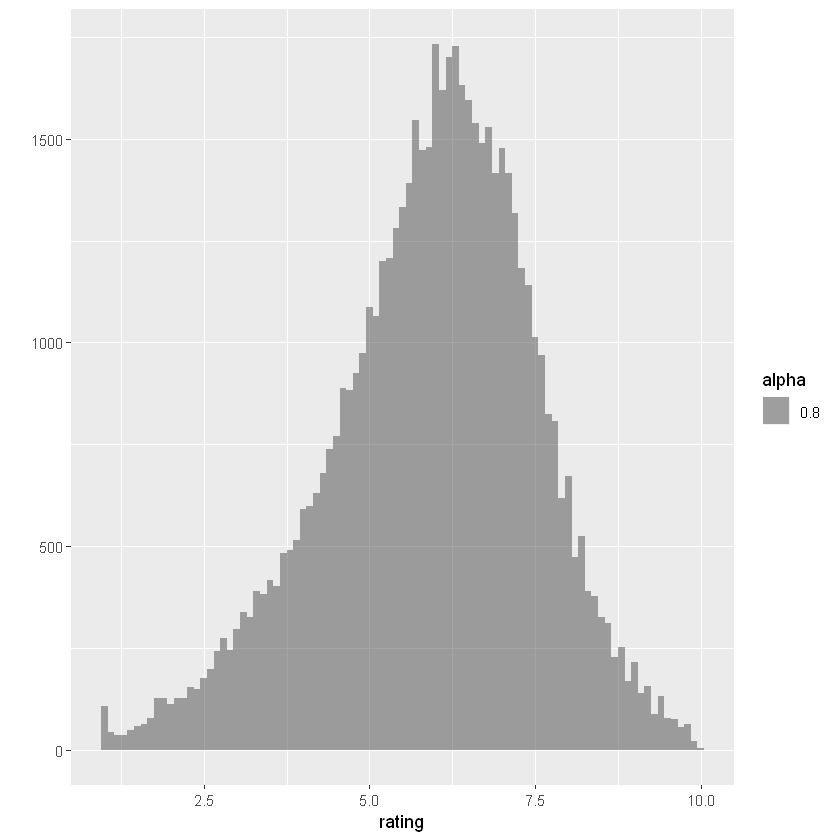

In [80]:
qplot(rating, data=movies, geom='histogram', binwidth = 0.1, alpha = 0.8)

# Using ggplot()
Let's see how we can really expand on this by using ggplot! The syntax compared to qplot() is much easier. 

In [81]:
# ggplot(data, aesthetics)
pl <- ggplot(movies,aes(x=rating))

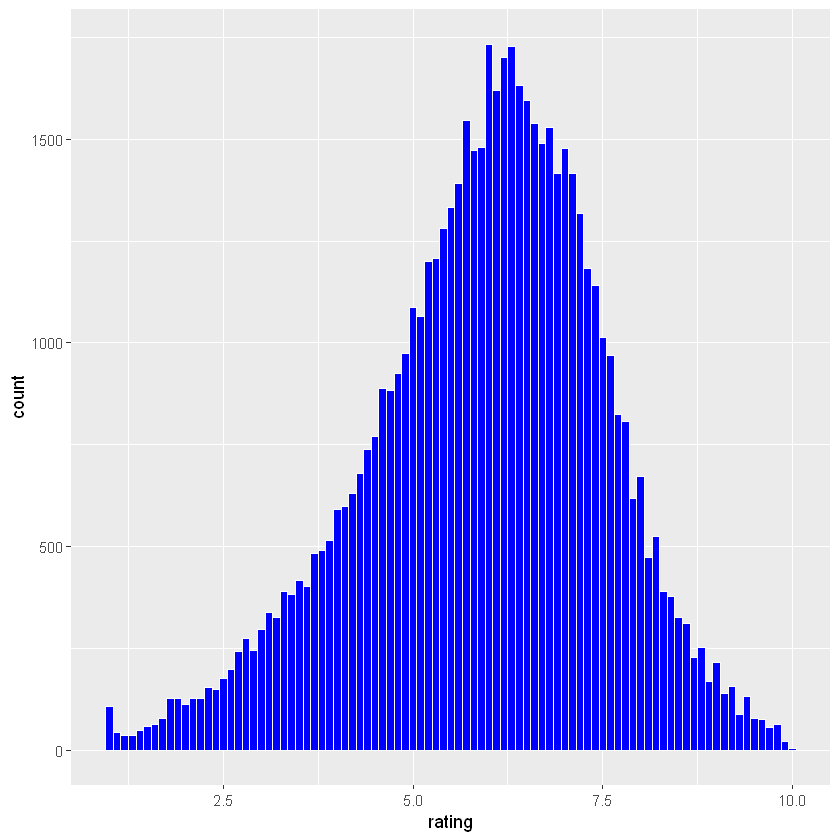

In [82]:
# Add Histogram Geometry
pl + geom_histogram(binwidth=0.1,color='white',fill='blue')

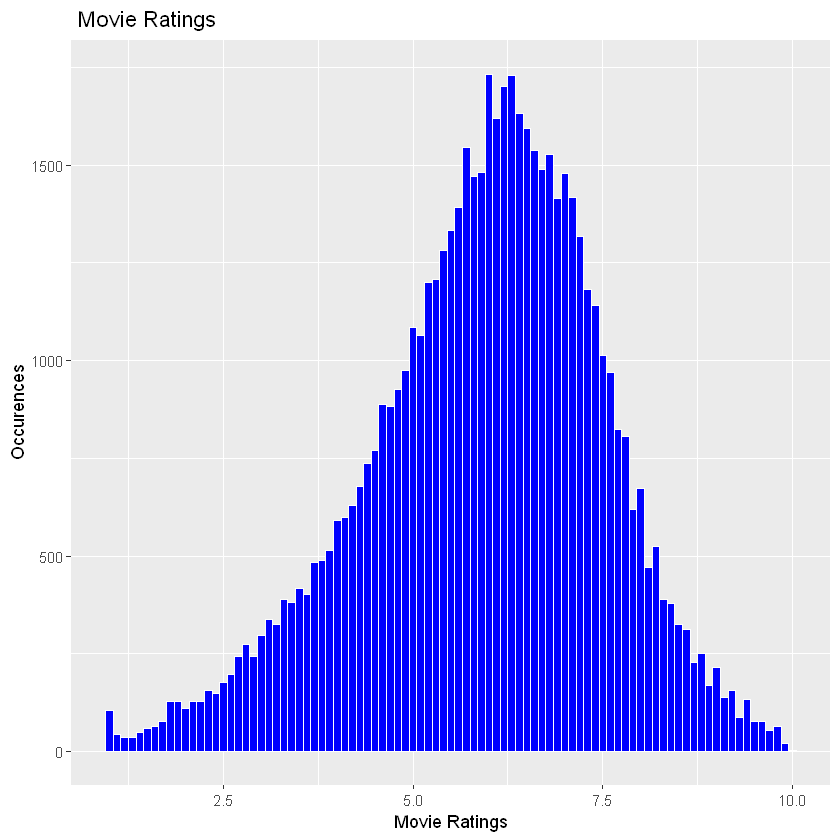

In [83]:
# Add Labels
pl + geom_histogram(binwidth=0.1,color='white',fill='blue') + 
xlab('Movie Ratings')+ ylab('Occurences') + ggtitle(' Movie Ratings')

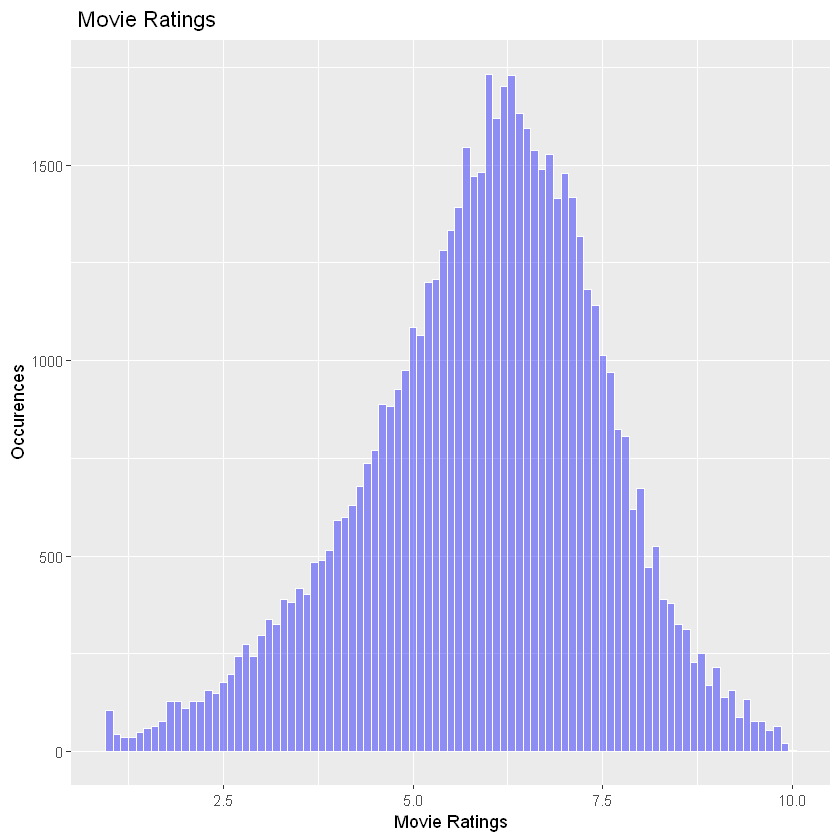

In [84]:
# Add Transparency (alpha)
pl + geom_histogram(binwidth=0.1,color='white',fill='blue', alpha = 0.4) + 
xlab('Movie Ratings')+ ylab('Occurences') + ggtitle(' Movie Ratings')

## Linetypes
We have the options: "blank", "solid", "dashed", "dotted", "dotdash", "longdash", and "twodash". You would never really use these with a histogram, but just to show your options:

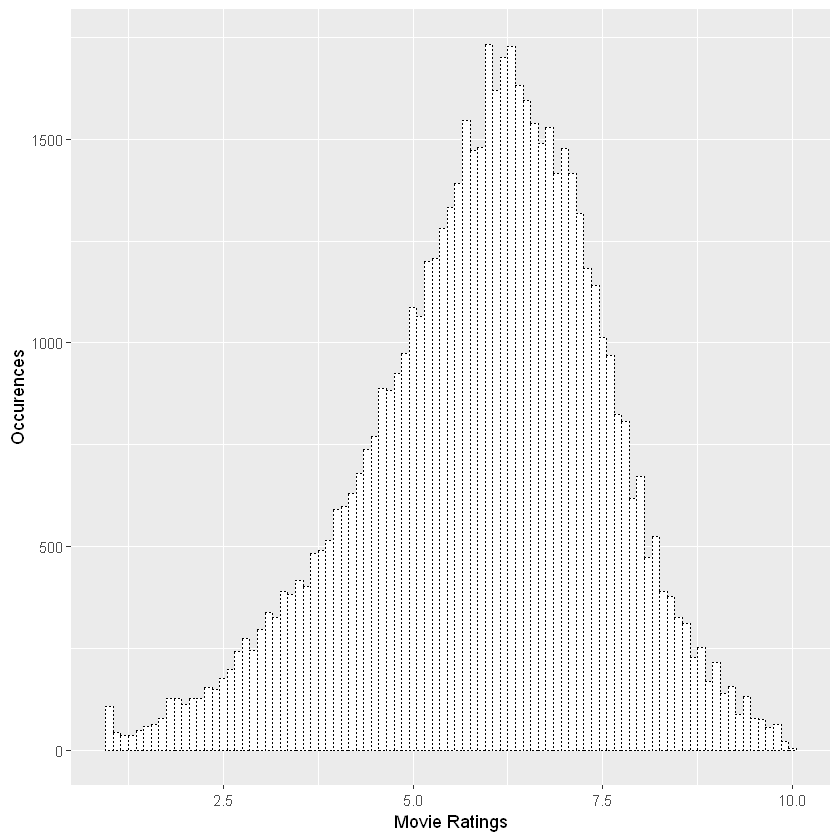

In [85]:
pl <- ggplot(movies,aes(x=rating))
pl + geom_histogram(binwidth=0.1,color='black',fill='white',linetype='dotted') +
xlab('Movie Ratings')+ ylab('Occurences')

## Advanced Aesthetics
We can add a aes() argument to the geom_histogram for some more advanced features. We won't go too deep into these, but ggplot gives you the ability to edit color and fill scales.

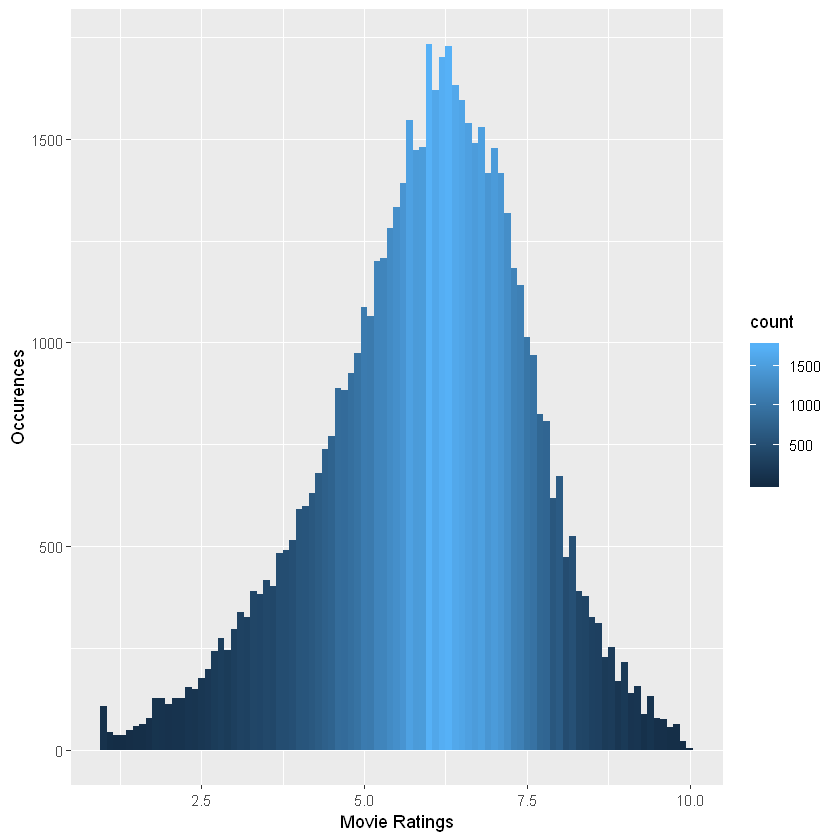

In [86]:
# Adding Labels
pl <- ggplot(movies,aes(x=rating))
pl + geom_histogram(binwidth=0.1,aes(fill=..count..)) + xlab('Movie Ratings')+ ylab('Occurences')
# Default is black to cyan

You can further edit this by adding the scale_fill_gradient() function to your ggplot objects:



In [87]:
pl <- ggplot(movies,aes(x=rating))
pl2 <- pl + geom_histogram(binwidth=0.1,aes(fill=..count..)) + xlab('Movie Ratings')+ ylab('Occurences') 
##pl2 + scale_fill_gradient('Count',low='red', high='yellow')

## Adding density plot
You can add a [kernel density estimation plot](https://en.wikipedia.org/wiki/Kernel_density_estimation)

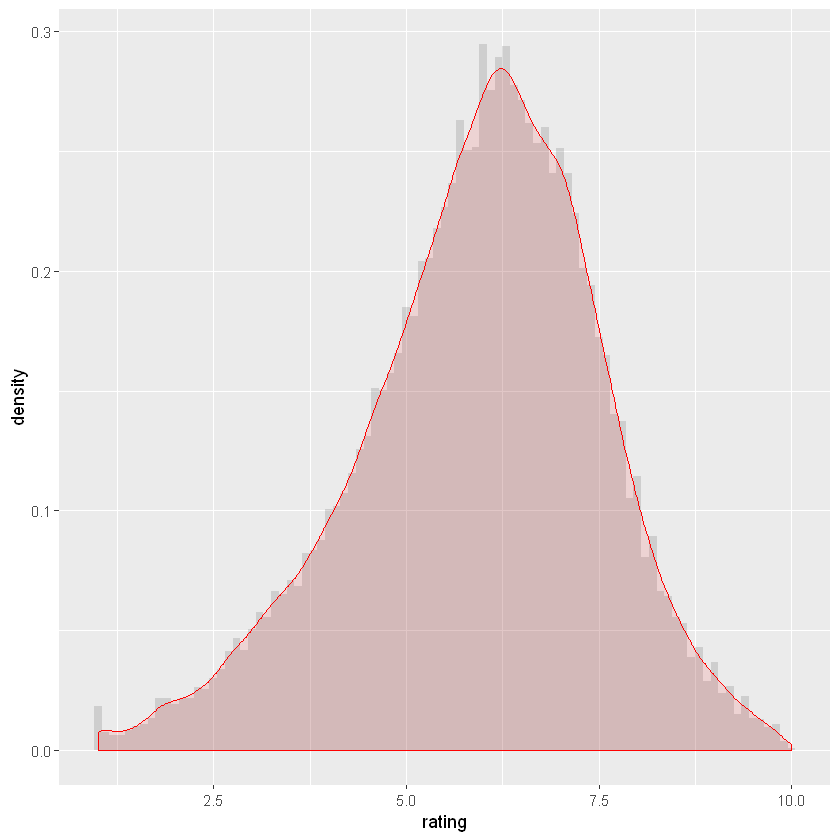

In [88]:
# Adding Labels
pl <- ggplot(movies,aes(x=rating))
pl + geom_histogram(binwidth=0.1, alpha = 0.2, aes(y=..density..)) + 
geom_density(color='red', fill ='red', alpha = 0.1)